In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
pd.set_option('display.max_columns', None)
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Text(0.5, 1.0, 'Correlation Heatmap')

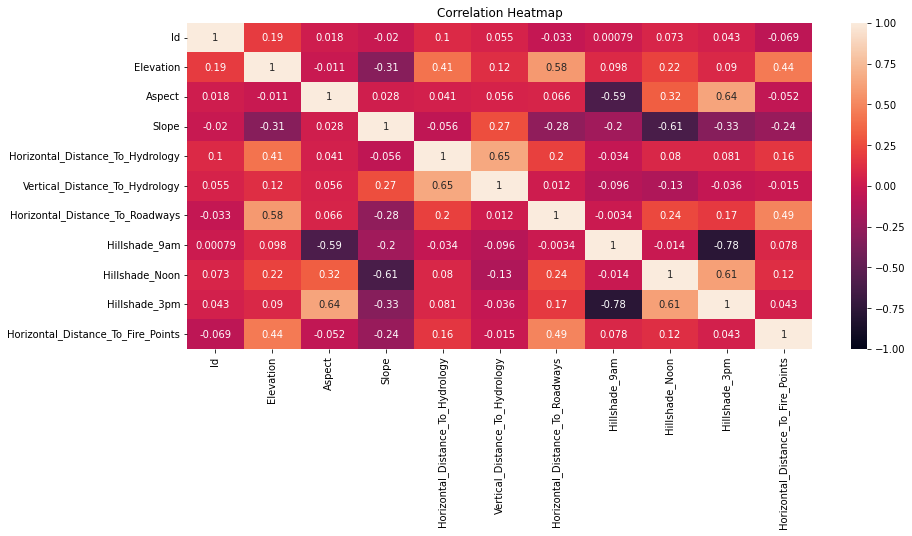

In [5]:
plt.figure(figsize=(14, 6))
size = 11
hp = sns.heatmap(train.iloc[:,:size].corr(),vmin = -1 , vmax=1,annot = True)
hp.set_title('Correlation Heatmap', fontdict = {'fontsize': 12})

## Setting up data

In [6]:
X = train.drop(['Id', 'Cover_Type'], axis= 1)
Y = train["Cover_Type"]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=40 )

## Neural Net

In [8]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
Y.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [10]:
X =np.array(X)
Y = np.array(Y)

In [11]:
X[:5], Y[:5]

(array([[2596,   51,    3,  258,    0,  510,  221,  232,  148, 6279,    1,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [2590,   56,    2,  212,   -6,  390,  220,  235,  151, 6225,    1,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [2804,  139,    9,  268,   65, 3180,  234,  238,  135, 6121,    1,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,   

In [12]:
l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)
Y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [13]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.4, random_state=40)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((9072, 54), (9072, 7), (6048, 54), (6048, 7))

In [162]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, input_dim= 54, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(75, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(0.001), 
              metrics = ['accuracy'])



In [79]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [80]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label = 'accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [163]:
history = model.fit(train_x, train_y, epochs = 155, batch_size = 32, validation_split= 0.2, verbose = 2)


Epoch 1/155
227/227 - 1s - loss: 3.8000 - accuracy: 0.2848 - val_loss: 1.6810 - val_accuracy: 0.3719 - 1s/epoch - 6ms/step
Epoch 2/155
227/227 - 1s - loss: 1.6172 - accuracy: 0.3729 - val_loss: 1.4807 - val_accuracy: 0.4369 - 532ms/epoch - 2ms/step
Epoch 3/155
227/227 - 1s - loss: 1.3531 - accuracy: 0.4476 - val_loss: 1.2553 - val_accuracy: 0.4854 - 512ms/epoch - 2ms/step
Epoch 4/155
227/227 - 1s - loss: 1.1837 - accuracy: 0.4904 - val_loss: 1.0696 - val_accuracy: 0.5377 - 513ms/epoch - 2ms/step
Epoch 5/155
227/227 - 1s - loss: 1.0874 - accuracy: 0.5278 - val_loss: 1.1503 - val_accuracy: 0.4876 - 515ms/epoch - 2ms/step
Epoch 6/155
227/227 - 1s - loss: 1.0521 - accuracy: 0.5338 - val_loss: 1.0312 - val_accuracy: 0.5344 - 513ms/epoch - 2ms/step
Epoch 7/155
227/227 - 1s - loss: 0.9917 - accuracy: 0.5771 - val_loss: 0.9908 - val_accuracy: 0.5697 - 560ms/epoch - 2ms/step
Epoch 8/155
227/227 - 1s - loss: 1.0292 - accuracy: 0.5544 - val_loss: 0.9418 - val_accuracy: 0.5647 - 537ms/epoch - 2ms/

Epoch 66/155
227/227 - 1s - loss: 0.4111 - accuracy: 0.8282 - val_loss: 0.6370 - val_accuracy: 0.7636 - 511ms/epoch - 2ms/step
Epoch 67/155
227/227 - 1s - loss: 0.4080 - accuracy: 0.8341 - val_loss: 0.6385 - val_accuracy: 0.7675 - 550ms/epoch - 2ms/step
Epoch 68/155
227/227 - 1s - loss: 0.4107 - accuracy: 0.8320 - val_loss: 0.6081 - val_accuracy: 0.7691 - 552ms/epoch - 2ms/step
Epoch 69/155
227/227 - 1s - loss: 0.4125 - accuracy: 0.8308 - val_loss: 0.5838 - val_accuracy: 0.7884 - 510ms/epoch - 2ms/step
Epoch 70/155
227/227 - 1s - loss: 0.4035 - accuracy: 0.8356 - val_loss: 0.5678 - val_accuracy: 0.7901 - 513ms/epoch - 2ms/step
Epoch 71/155
227/227 - 1s - loss: 0.3769 - accuracy: 0.8453 - val_loss: 0.5987 - val_accuracy: 0.7829 - 505ms/epoch - 2ms/step
Epoch 72/155
227/227 - 1s - loss: 0.3831 - accuracy: 0.8484 - val_loss: 0.6047 - val_accuracy: 0.7851 - 513ms/epoch - 2ms/step
Epoch 73/155
227/227 - 1s - loss: 0.3852 - accuracy: 0.8477 - val_loss: 0.6315 - val_accuracy: 0.7884 - 545ms/e

Epoch 131/155
227/227 - 1s - loss: 0.2334 - accuracy: 0.9091 - val_loss: 0.6923 - val_accuracy: 0.7972 - 563ms/epoch - 2ms/step
Epoch 132/155
227/227 - 1s - loss: 0.2338 - accuracy: 0.9100 - val_loss: 0.7270 - val_accuracy: 0.8055 - 555ms/epoch - 2ms/step
Epoch 133/155
227/227 - 1s - loss: 0.2287 - accuracy: 0.9119 - val_loss: 0.7121 - val_accuracy: 0.8028 - 563ms/epoch - 2ms/step
Epoch 134/155
227/227 - 1s - loss: 0.2183 - accuracy: 0.9173 - val_loss: 0.8341 - val_accuracy: 0.7548 - 542ms/epoch - 2ms/step
Epoch 135/155
227/227 - 1s - loss: 0.2497 - accuracy: 0.9038 - val_loss: 0.7289 - val_accuracy: 0.7934 - 547ms/epoch - 2ms/step
Epoch 136/155
227/227 - 1s - loss: 0.2260 - accuracy: 0.9110 - val_loss: 0.7407 - val_accuracy: 0.7972 - 545ms/epoch - 2ms/step
Epoch 137/155
227/227 - 1s - loss: 0.2146 - accuracy: 0.9183 - val_loss: 0.7315 - val_accuracy: 0.8072 - 605ms/epoch - 3ms/step
Epoch 138/155
227/227 - 1s - loss: 0.1821 - accuracy: 0.9271 - val_loss: 0.7556 - val_accuracy: 0.7994 -

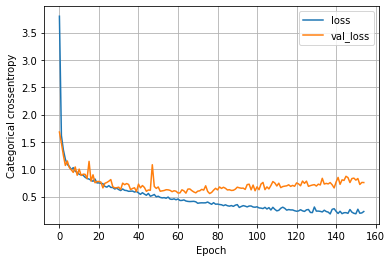

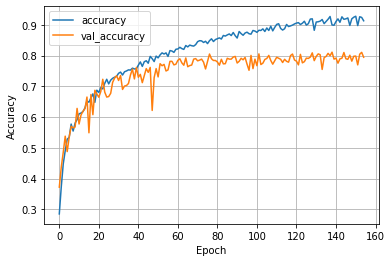

In [164]:
plot_loss(history)
plot_accuracy(history)


In [165]:
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis = 1)
y_test=np.argmax(test_y, axis=1)

print(classification_report(y_test, y_pred))

189/189 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       891
           1       0.60      0.65      0.62       887
           2       0.80      0.77      0.78       833
           3       0.92      0.95      0.94       875
           4       0.86      0.84      0.85       853
           5       0.80      0.78      0.79       866
           6       0.84      0.96      0.90       843

    accuracy                           0.79      6048
   macro avg       0.79      0.79      0.79      6048
weighted avg       0.79      0.79      0.79      6048

